In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
raw_df = pd.read_csv("synthetic.csv")
raw_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
0,-14.698830,2.369710,1.089267,-1.262030,-15.650082,-16.665997,15.909853,-11.121045,18.275820,-2.405075,...,-5.421817,15.233291,-3.484405,2.755223,9.766386,6.419560,6.618973,15.171849,1.926773,1
1,-8.457451,2.182712,0.972360,-4.255289,-11.524392,-4.843399,9.557964,-10.145921,6.655710,-2.821156,...,-5.398857,20.342647,-5.395054,2.816668,14.932127,9.134028,4.826775,12.077634,3.397375,0
2,-6.541517,1.263892,-0.494469,-2.562072,-8.979410,-23.632245,15.740920,-4.460916,-16.528412,-3.901285,...,-5.339781,10.859401,-2.095555,2.945595,14.778588,2.711564,-0.090958,-5.467509,3.088641,0
3,-18.139840,1.569545,-3.286717,-4.255045,-16.146687,-25.893126,12.005963,-2.228017,5.853151,-2.951831,...,-5.652446,-8.674892,-9.665123,8.876766,22.335086,10.194627,2.720710,-1.787331,-0.291131,0
4,-12.500957,2.313632,5.227138,2.586718,-15.022213,-3.105726,18.070314,-7.745197,0.300133,-3.364458,...,-5.551594,13.195368,-5.089818,12.362742,22.624796,4.407471,3.022274,-1.705888,6.650217,0


In [7]:
neg, pos = np.bincount(raw_df['y'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1000
    Positive: 145 (14.50% of total)



In [8]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(raw_df,stratify=raw_df['y'], test_size=0.2)
train_df, val_df = train_test_split(train_df,stratify=train_df['y'], test_size=0.2)

In [9]:
neg1, pos1 = np.bincount(val_df['y'])
total1 = neg1 + pos1
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total1, pos1, 100 * pos1 / total1))

Examples:
    Total: 160
    Positive: 23 (14.38% of total)



In [10]:
# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('y'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('y'))
test_labels = np.array(test_df.pop('y'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [11]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (640,)
Validation labels shape: (160,)
Test labels shape: (200,)
Training features shape: (640, 30)
Validation features shape: (160, 30)
Test features shape: (200, 30)


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be

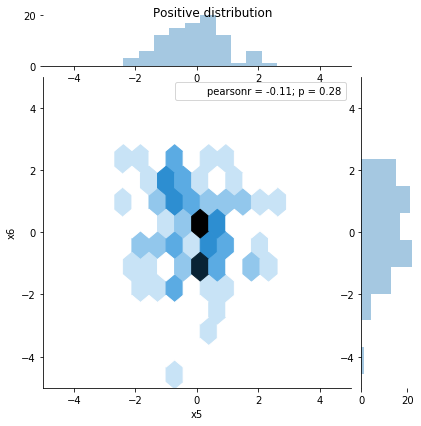

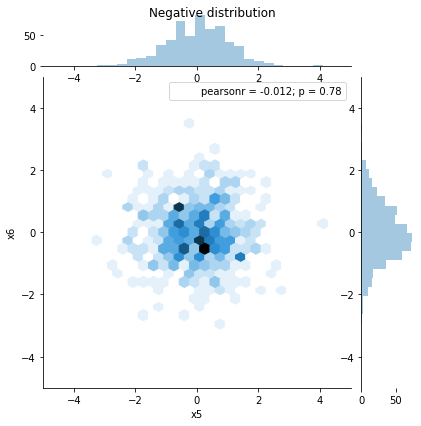

In [12]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

sns.jointplot(pos_df['x5'], pos_df['x6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['x5'], neg_df['x6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

In [13]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [14]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [15]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.predict(train_features[:10])

array([[0.25966686],
       [0.73870325],
       [0.48518232],
       [0.59320426],
       [0.27933818],
       [0.36404544],
       [0.64408356],
       [0.38124034],
       [0.16487311],
       [0.33606428]], dtype=float32)

In [17]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7087


In [18]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.77436773])

In [19]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.32359552],
       [0.38295317],
       [0.60257274],
       [0.2251682 ],
       [0.2840244 ],
       [0.3630157 ],
       [0.48914573],
       [0.07515812],
       [0.2636223 ],
       [0.3272193 ]], dtype=float32)

In [20]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5734


In [21]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [22]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [23]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [24]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

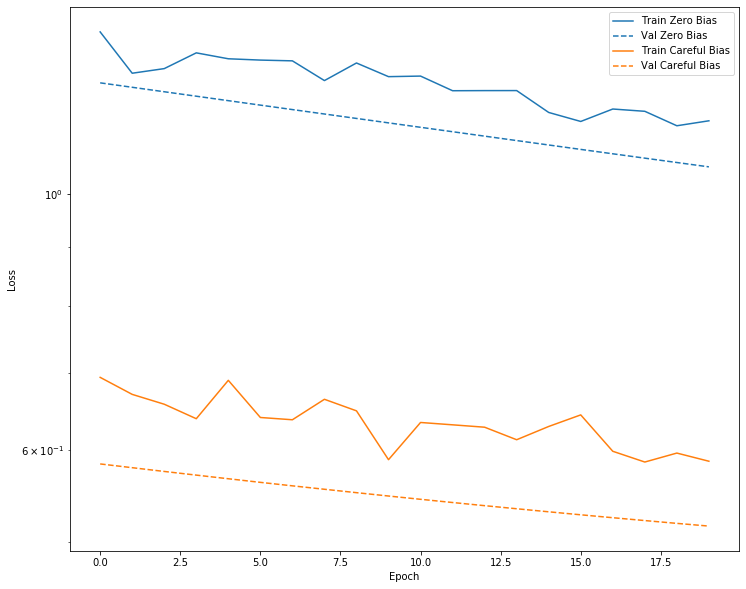

In [25]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [26]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 3s 4ms/sample - loss: 0.6842 - tp: 23.0000 - fp: 145.0000 - tn: 402.0000 - fn: 70.0000 - accuracy: 0.6641 - precision: 0.1369 - recall: 0.2473 - auc: 0.5027 - val_loss: 0.5839 - val_tp: 3.0000 - val_fp: 26.0000 - val_tn: 111.0000 - val_fn: 20.0000 - val_accuracy: 0.7125 - val_precision: 0.1034 - val_recall: 0.1304 - val_auc: 0.4365
Epoch 2/100
640/640 [==============================] - 0s 66us/sample - loss: 0.6656 - tp: 23.0000 - fp: 146.0000 - tn: 401.0000 - fn: 70.0000 - accuracy: 0.6625 - precision: 0.1361 - recall: 0.2473 - auc: 0.5151 - val_loss: 0.5795 - val_tp: 3.0000 - val_fp: 25.0000 - val_tn: 112.0000 - val_fn: 20.0000 - val_accuracy: 0.7188 - val_precision: 0.1071 - val_recall: 0.1304 - val_auc: 0.4354
Epoch 3/100
640/640 [==============================] - 0s 67us/sample - loss: 0.6606 - tp: 24.0000 - fp: 136.0000 - tn: 411.0000 - fn: 69.0000 - accuracy: 0.6797 - precision: 

In [27]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.4,0.9])
    else:
      plt.ylim([0,1])

    plt.legend()


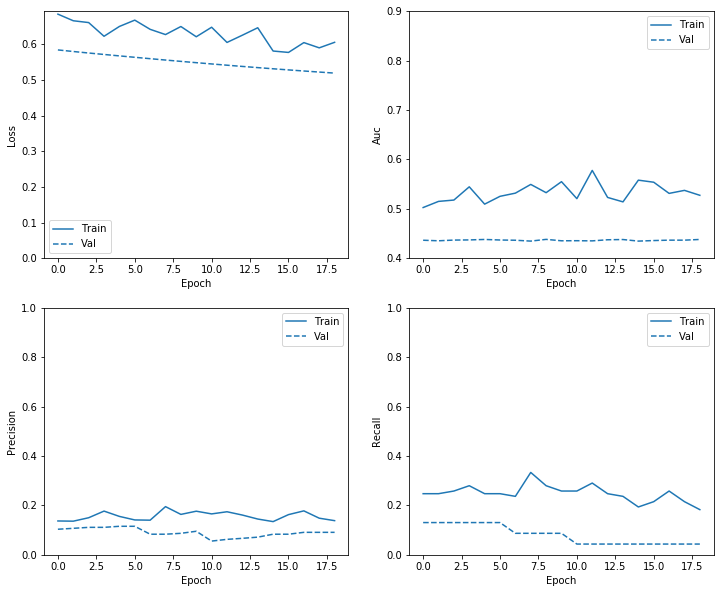

In [28]:
plot_metrics(baseline_history)

In [29]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [59]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.5033616423606873
tp :  7.0
fp :  27.0
tn :  144.0
fn :  22.0
accuracy :  0.755
precision :  0.20588236
recall :  0.2413793
auc :  0.6411575

Legitimate Transactions Detected (True Negatives):  144
Legitimate Transactions Incorrectly Detected (False Positives):  27
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  7
Total Fraudulent Transactions:  29


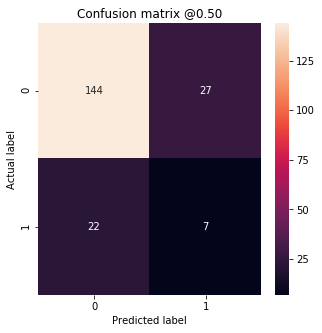

In [60]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [32]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([30,100.5])
  plt.grid(True)
  ax = plt.gca()

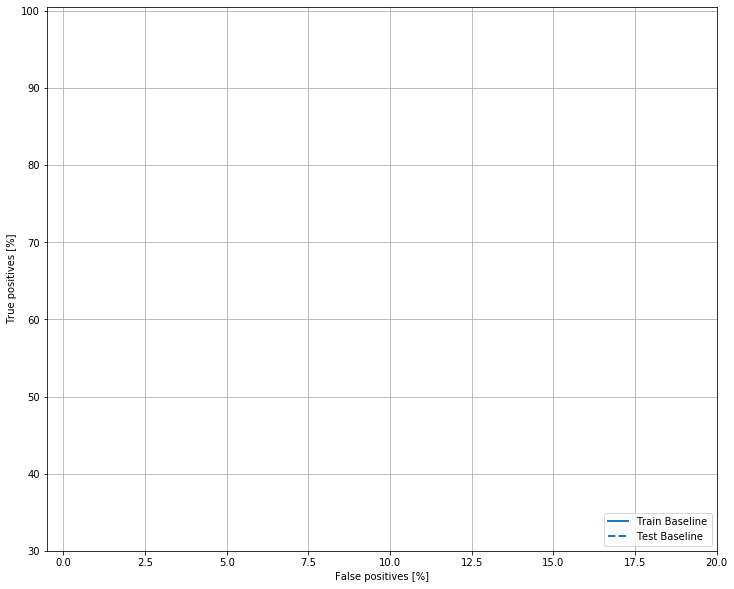

In [33]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [34]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.58
Weight for class 1: 3.45


In [35]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 3s 5ms/sample - loss: 0.9078 - tp: 26.0000 - fp: 146.0000 - tn: 401.0000 - fn: 67.0000 - accuracy: 0.6672 - precision: 0.1512 - recall: 0.2796 - auc: 0.5261 - val_loss: 0.8925 - val_tp: 3.0000 - val_fp: 26.0000 - val_tn: 111.0000 - val_fn: 20.0000 - val_accuracy: 0.7125 - val_precision: 0.1034 - val_recall: 0.1304 - val_auc: 0.4364
Epoch 2/100
640/640 [==============================] - 0s 75us/sample - loss: 0.9164 - tp: 27.0000 - fp: 154.0000 - tn: 393.0000 - fn: 66.0000 - accuracy: 0.6562 - precision: 0.1492 - recall: 0.2903 - auc: 0.5202 - val_loss: 0.8898 - val_tp: 3.0000 - val_fp: 26.0000 - val_tn: 111.0000 - val_fn: 20.0000 - val_accuracy: 0.7125 - val_precision: 0.1034 - val_recall: 0.1304 - val_auc: 0.4391
Epoch 3/100
640/640 [==============================] - 0s 74us/sample - loss: 0.9759 - tp: 22.0000 - fp: 148.0000 - tn: 399.0000 - fn: 71.0000 - accuracy: 0.6578 - precision: 

Epoch 22/100
640/640 [==============================] - 0s 72us/sample - loss: 0.8990 - tp: 23.0000 - fp: 143.0000 - tn: 404.0000 - fn: 70.0000 - accuracy: 0.6672 - precision: 0.1386 - recall: 0.2473 - auc: 0.5298 - val_loss: 0.8450 - val_tp: 4.0000 - val_fp: 28.0000 - val_tn: 109.0000 - val_fn: 19.0000 - val_accuracy: 0.7063 - val_precision: 0.1250 - val_recall: 0.1739 - val_auc: 0.4537
Epoch 23/100
640/640 [==============================] - 0s 74us/sample - loss: 0.8540 - tp: 26.0000 - fp: 155.0000 - tn: 392.0000 - fn: 67.0000 - accuracy: 0.6531 - precision: 0.1436 - recall: 0.2796 - auc: 0.5435 - val_loss: 0.8431 - val_tp: 4.0000 - val_fp: 28.0000 - val_tn: 109.0000 - val_fn: 19.0000 - val_accuracy: 0.7063 - val_precision: 0.1250 - val_recall: 0.1739 - val_auc: 0.4524
Epoch 24/100
640/640 [==============================] - 0s 75us/sample - loss: 0.8272 - tp: 38.0000 - fp: 150.0000 - tn: 397.0000 - fn: 55.0000 - accuracy: 0.6797 - precision: 0.2021 - recall: 0.4086 - auc: 0.5768 - va

Epoch 43/100
640/640 [==============================] - 0s 74us/sample - loss: 0.8516 - tp: 30.0000 - fp: 147.0000 - tn: 400.0000 - fn: 63.0000 - accuracy: 0.6719 - precision: 0.1695 - recall: 0.3226 - auc: 0.5443 - val_loss: 0.8117 - val_tp: 4.0000 - val_fp: 28.0000 - val_tn: 109.0000 - val_fn: 19.0000 - val_accuracy: 0.7063 - val_precision: 0.1250 - val_recall: 0.1739 - val_auc: 0.4702
Epoch 44/100
640/640 [==============================] - 0s 75us/sample - loss: 0.8052 - tp: 37.0000 - fp: 154.0000 - tn: 393.0000 - fn: 56.0000 - accuracy: 0.6719 - precision: 0.1937 - recall: 0.3978 - auc: 0.5846 - val_loss: 0.8102 - val_tp: 4.0000 - val_fp: 28.0000 - val_tn: 109.0000 - val_fn: 19.0000 - val_accuracy: 0.7063 - val_precision: 0.1250 - val_recall: 0.1739 - val_auc: 0.4716
Epoch 45/100
640/640 [==============================] - 0s 74us/sample - loss: 0.8896 - tp: 28.0000 - fp: 160.0000 - tn: 387.0000 - fn: 65.0000 - accuracy: 0.6484 - precision: 0.1489 - recall: 0.3011 - auc: 0.5226 - va

Epoch 64/100
640/640 [==============================] - 0s 74us/sample - loss: 0.8433 - tp: 27.0000 - fp: 161.0000 - tn: 386.0000 - fn: 66.0000 - accuracy: 0.6453 - precision: 0.1436 - recall: 0.2903 - auc: 0.5248 - val_loss: 0.7844 - val_tp: 4.0000 - val_fp: 28.0000 - val_tn: 109.0000 - val_fn: 19.0000 - val_accuracy: 0.7063 - val_precision: 0.1250 - val_recall: 0.1739 - val_auc: 0.5005
Epoch 65/100
640/640 [==============================] - 0s 74us/sample - loss: 0.7569 - tp: 36.0000 - fp: 162.0000 - tn: 385.0000 - fn: 57.0000 - accuracy: 0.6578 - precision: 0.1818 - recall: 0.3871 - auc: 0.6023 - val_loss: 0.7833 - val_tp: 4.0000 - val_fp: 28.0000 - val_tn: 109.0000 - val_fn: 19.0000 - val_accuracy: 0.7063 - val_precision: 0.1250 - val_recall: 0.1739 - val_auc: 0.5021
Epoch 66/100
640/640 [==============================] - 0s 73us/sample - loss: 0.7792 - tp: 32.0000 - fp: 144.0000 - tn: 403.0000 - fn: 61.0000 - accuracy: 0.6797 - precision: 0.1818 - recall: 0.3441 - auc: 0.5795 - va

Epoch 85/100
640/640 [==============================] - 0s 76us/sample - loss: 0.7339 - tp: 42.0000 - fp: 145.0000 - tn: 402.0000 - fn: 51.0000 - accuracy: 0.6938 - precision: 0.2246 - recall: 0.4516 - auc: 0.6307 - val_loss: 0.7660 - val_tp: 5.0000 - val_fp: 27.0000 - val_tn: 110.0000 - val_fn: 18.0000 - val_accuracy: 0.7188 - val_precision: 0.1562 - val_recall: 0.2174 - val_auc: 0.5156
Epoch 86/100
640/640 [==============================] - 0s 75us/sample - loss: 0.7259 - tp: 47.0000 - fp: 161.0000 - tn: 386.0000 - fn: 46.0000 - accuracy: 0.6766 - precision: 0.2260 - recall: 0.5054 - auc: 0.6261 - val_loss: 0.7653 - val_tp: 5.0000 - val_fp: 27.0000 - val_tn: 110.0000 - val_fn: 18.0000 - val_accuracy: 0.7188 - val_precision: 0.1562 - val_recall: 0.2174 - val_auc: 0.5149
Epoch 87/100
640/640 [==============================] - 0s 75us/sample - loss: 0.8087 - tp: 41.0000 - fp: 176.0000 - tn: 371.0000 - fn: 52.0000 - accuracy: 0.6438 - precision: 0.1889 - recall: 0.4409 - auc: 0.5712 - va

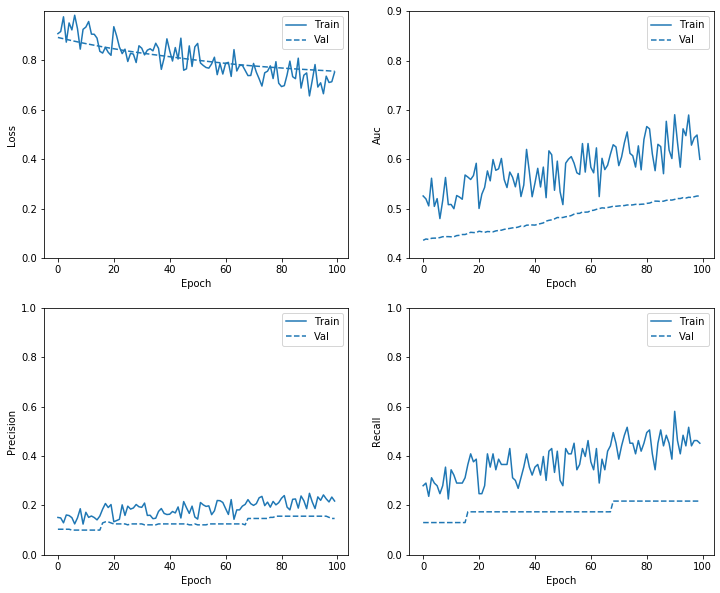

In [36]:
plot_metrics(weighted_history)

In [37]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.5298943519592285
tp :  9.0
fp :  28.0
tn :  143.0
fn :  20.0
accuracy :  0.76
precision :  0.24324325
recall :  0.31034482
auc :  0.68421054

Legitimate Transactions Detected (True Negatives):  143
Legitimate Transactions Incorrectly Detected (False Positives):  28
Fraudulent Transactions Missed (False Negatives):  20
Fraudulent Transactions Detected (True Positives):  9
Total Fraudulent Transactions:  29


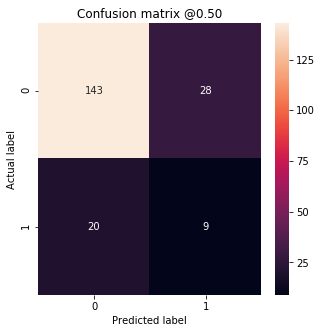

In [61]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

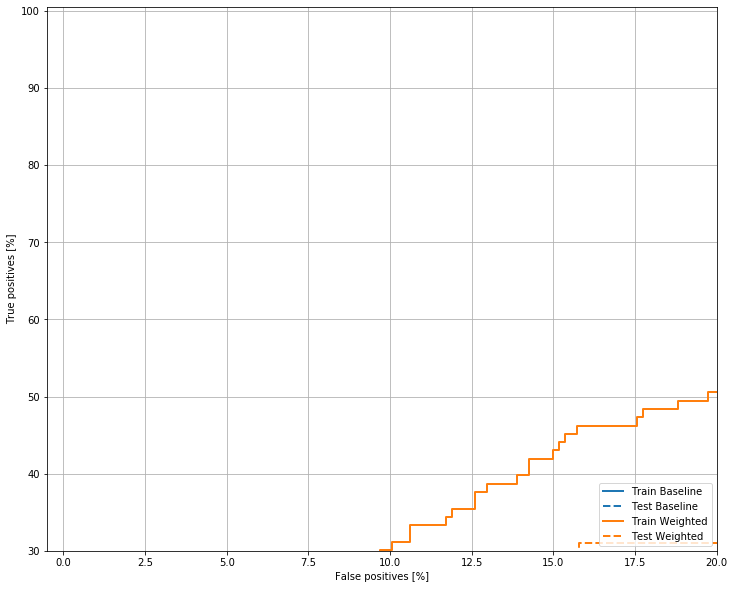

In [39]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [40]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [41]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(547, 30)

In [42]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(1094, 30)

In [43]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [44]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-0.30666096 -0.20515556  0.35908303 -0.06423608 -0.44406257  0.42486258
  2.5737254   2.15944626  0.02737155 -1.68848887 -0.55839554 -1.47346838
  1.31571262 -1.27408849 -1.09321054 -0.46053521  0.18206113 -0.61875536
 -0.54410215 -0.16605514  0.20452959  0.58437697 -0.90307311 -0.57361777
 -0.39009874  0.1914896  -0.44297737 -0.49856502  0.31986817  0.20375827]

Label:  1


In [45]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [46]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.4931640625


In [47]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

1.0

In [48]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks = [early_stopping],
    validation_data=val_ds)

Train for 1.0 steps, validate for 1 steps
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.9634 - tp: 814.0000 - fp: 782.0000 - tn: 256.0000 - fn: 196.0000 - accuracy: 0.5225 - precision: 0.5100 - recall: 0.8059 - auc: 0.5332 - val_loss: 1.2482 - val_tp: 21.0000 - val_fp: 121.0000 - val_tn: 16.0000 - val_fn: 2.0000 - val_accuracy: 0.2313 - val_precision: 0.1479 - val_recall: 0.9130 - val_auc: 0.4387
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 0.9409 - tp: 813.0000 - fp: 752.0000 - tn: 259.0000 - fn: 224.0000 - accuracy: 0.5234 - precision: 0.5195 - recall: 0.7840 - auc: 0.5236 - val_loss: 1.2381 - val_tp: 21.0000 - val_fp: 121.0000 - val_tn: 16.0000 - val_fn: 2.0000 - val_accuracy: 0.2313 - val_precision: 0.1479 - val_recall: 0.9130 - val_auc: 0.4370
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 0.9526 - tp: 828.0000 - fp: 781.0000 - tn: 246.0000 - fn: 193.0000 - accuracy: 0.5244 - precision: 0.5146 - recall: 

Epoch 23/100
1/1 [==============================] - 0s 34ms/step - loss: 0.8381 - tp: 780.0000 - fp: 714.0000 - tn: 314.0000 - fn: 240.0000 - accuracy: 0.5342 - precision: 0.5221 - recall: 0.7647 - auc: 0.5645 - val_loss: 1.0501 - val_tp: 20.0000 - val_fp: 110.0000 - val_tn: 27.0000 - val_fn: 3.0000 - val_accuracy: 0.2937 - val_precision: 0.1538 - val_recall: 0.8696 - val_auc: 0.4481
Epoch 24/100
1/1 [==============================] - 0s 32ms/step - loss: 0.8649 - tp: 767.0000 - fp: 699.0000 - tn: 324.0000 - fn: 258.0000 - accuracy: 0.5327 - precision: 0.5232 - recall: 0.7483 - auc: 0.5487 - val_loss: 1.0425 - val_tp: 20.0000 - val_fp: 110.0000 - val_tn: 27.0000 - val_fn: 3.0000 - val_accuracy: 0.2937 - val_precision: 0.1538 - val_recall: 0.8696 - val_auc: 0.4489
Epoch 25/100
1/1 [==============================] - 0s 35ms/step - loss: 0.8434 - tp: 789.0000 - fp: 685.0000 - tn: 326.0000 - fn: 248.0000 - accuracy: 0.5444 - precision: 0.5353 - recall: 0.7608 - auc: 0.5561 - val_loss: 1.03

Epoch 45/100
1/1 [==============================] - 0s 31ms/step - loss: 0.8125 - tp: 724.0000 - fp: 651.0000 - tn: 383.0000 - fn: 290.0000 - accuracy: 0.5405 - precision: 0.5265 - recall: 0.7140 - auc: 0.5549 - val_loss: 0.9116 - val_tp: 18.0000 - val_fp: 104.0000 - val_tn: 33.0000 - val_fn: 5.0000 - val_accuracy: 0.3187 - val_precision: 0.1475 - val_recall: 0.7826 - val_auc: 0.4687
Epoch 46/100
1/1 [==============================] - 0s 36ms/step - loss: 0.7709 - tp: 778.0000 - fp: 647.0000 - tn: 364.0000 - fn: 259.0000 - accuracy: 0.5576 - precision: 0.5460 - recall: 0.7502 - auc: 0.5876 - val_loss: 0.9066 - val_tp: 18.0000 - val_fp: 104.0000 - val_tn: 33.0000 - val_fn: 5.0000 - val_accuracy: 0.3187 - val_precision: 0.1475 - val_recall: 0.7826 - val_auc: 0.4697
Epoch 47/100
1/1 [==============================] - 0s 31ms/step - loss: 0.7979 - tp: 727.0000 - fp: 668.0000 - tn: 376.0000 - fn: 277.0000 - accuracy: 0.5386 - precision: 0.5211 - recall: 0.7241 - auc: 0.5605 - val_loss: 0.90

Epoch 67/100
1/1 [==============================] - 0s 31ms/step - loss: 0.7288 - tp: 731.0000 - fp: 587.0000 - tn: 471.0000 - fn: 259.0000 - accuracy: 0.5869 - precision: 0.5546 - recall: 0.7384 - auc: 0.6266 - val_loss: 0.8244 - val_tp: 17.0000 - val_fp: 90.0000 - val_tn: 47.0000 - val_fn: 6.0000 - val_accuracy: 0.4000 - val_precision: 0.1589 - val_recall: 0.7391 - val_auc: 0.5097
Epoch 68/100
1/1 [==============================] - 0s 40ms/step - loss: 0.7347 - tp: 738.0000 - fp: 588.0000 - tn: 440.0000 - fn: 282.0000 - accuracy: 0.5752 - precision: 0.5566 - recall: 0.7235 - auc: 0.6112 - val_loss: 0.8211 - val_tp: 17.0000 - val_fp: 89.0000 - val_tn: 48.0000 - val_fn: 6.0000 - val_accuracy: 0.4062 - val_precision: 0.1604 - val_recall: 0.7391 - val_auc: 0.5114
Epoch 69/100
1/1 [==============================] - 0s 35ms/step - loss: 0.7378 - tp: 714.0000 - fp: 600.0000 - tn: 438.0000 - fn: 296.0000 - accuracy: 0.5625 - precision: 0.5434 - recall: 0.7069 - auc: 0.6109 - val_loss: 0.8178

Epoch 89/100
1/1 [==============================] - 0s 39ms/step - loss: 0.7112 - tp: 699.0000 - fp: 554.0000 - tn: 478.0000 - fn: 317.0000 - accuracy: 0.5747 - precision: 0.5579 - recall: 0.6880 - auc: 0.6150 - val_loss: 0.7622 - val_tp: 14.0000 - val_fp: 78.0000 - val_tn: 59.0000 - val_fn: 9.0000 - val_accuracy: 0.4563 - val_precision: 0.1522 - val_recall: 0.6087 - val_auc: 0.5340
Epoch 90/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6961 - tp: 760.0000 - fp: 521.0000 - tn: 468.0000 - fn: 299.0000 - accuracy: 0.5996 - precision: 0.5933 - recall: 0.7177 - auc: 0.6308 - val_loss: 0.7600 - val_tp: 14.0000 - val_fp: 76.0000 - val_tn: 61.0000 - val_fn: 9.0000 - val_accuracy: 0.4688 - val_precision: 0.1556 - val_recall: 0.6087 - val_auc: 0.5354
Epoch 91/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6861 - tp: 729.0000 - fp: 525.0000 - tn: 493.0000 - fn: 301.0000 - accuracy: 0.5967 - precision: 0.5813 - recall: 0.7078 - auc: 0.6442 - val_loss: 0.7579

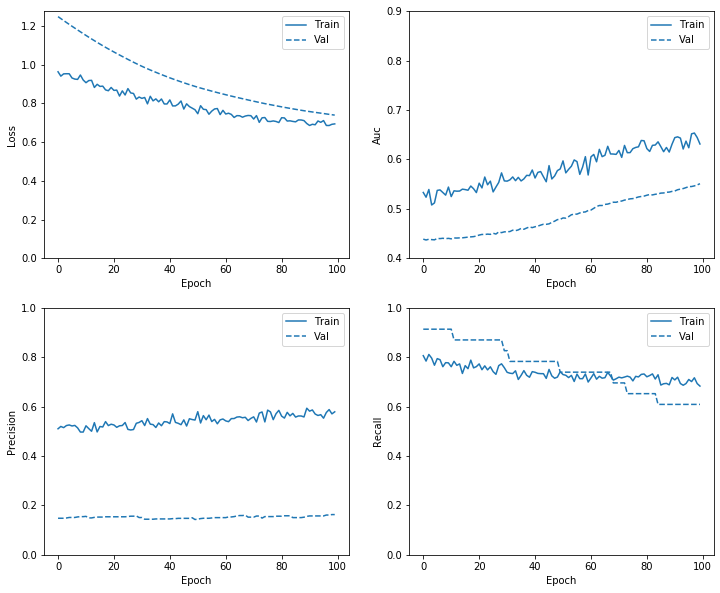

In [49]:
plot_metrics(resampled_history )

In [50]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch = 20,
    epochs=10*EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_ds))

Train for 20 steps, validate for 1 steps
Epoch 1/1000
20/20 [==============================] - 3s 161ms/step - loss: 0.9156 - tp: 16000.0000 - fp: 14911.0000 - tn: 5501.0000 - fn: 4548.0000 - accuracy: 0.5249 - precision: 0.5176 - recall: 0.7787 - auc: 0.5327 - val_loss: 1.0723 - val_tp: 20.0000 - val_fp: 110.0000 - val_tn: 27.0000 - val_fn: 3.0000 - val_accuracy: 0.2937 - val_precision: 0.1538 - val_recall: 0.8696 - val_auc: 0.4468
Epoch 2/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.8322 - tp: 15286.0000 - fp: 13682.0000 - tn: 6755.0000 - fn: 5237.0000 - accuracy: 0.5381 - precision: 0.5277 - recall: 0.7448 - auc: 0.5566 - val_loss: 0.9378 - val_tp: 18.0000 - val_fp: 106.0000 - val_tn: 31.0000 - val_fn: 5.0000 - val_accuracy: 0.3063 - val_precision: 0.1452 - val_recall: 0.7826 - val_auc: 0.4637
Epoch 3/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.7719 - tp: 15086.0000 - fp: 12504.0000 - tn: 7730.0000 - fn: 5640.0000 - accuracy: 0.5570 -

Epoch 22/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4735 - tp: 16414.0000 - fp: 5381.0000 - tn: 15166.0000 - fn: 3999.0000 - accuracy: 0.7710 - precision: 0.7531 - recall: 0.8041 - auc: 0.8612 - val_loss: 0.5287 - val_tp: 8.0000 - val_fp: 32.0000 - val_tn: 105.0000 - val_fn: 15.0000 - val_accuracy: 0.7063 - val_precision: 0.2000 - val_recall: 0.3478 - val_auc: 0.6474
Epoch 23/1000
20/20 [==============================] - 0s 25ms/step - loss: 0.4642 - tp: 16571.0000 - fp: 5375.0000 - tn: 15224.0000 - fn: 3790.0000 - accuracy: 0.7762 - precision: 0.7551 - recall: 0.8139 - auc: 0.8669 - val_loss: 0.5226 - val_tp: 7.0000 - val_fp: 30.0000 - val_tn: 107.0000 - val_fn: 16.0000 - val_accuracy: 0.7125 - val_precision: 0.1892 - val_recall: 0.3043 - val_auc: 0.6496
Epoch 24/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4562 - tp: 16577.0000 - fp: 5150.0000 - tn: 15378.0000 - fn: 3855.0000 - accuracy: 0.7802 - precision: 0.7630 - recall: 0.8113 - a

Epoch 43/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.3609 - tp: 17980.0000 - fp: 3651.0000 - tn: 16842.0000 - fn: 2487.0000 - accuracy: 0.8501 - precision: 0.8312 - recall: 0.8785 - auc: 0.9253 - val_loss: 0.4726 - val_tp: 7.0000 - val_fp: 17.0000 - val_tn: 120.0000 - val_fn: 16.0000 - val_accuracy: 0.7937 - val_precision: 0.2917 - val_recall: 0.3043 - val_auc: 0.6769
Epoch 44/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.3601 - tp: 18115.0000 - fp: 3531.0000 - tn: 16787.0000 - fn: 2527.0000 - accuracy: 0.8521 - precision: 0.8369 - recall: 0.8776 - auc: 0.9252 - val_loss: 0.4712 - val_tp: 7.0000 - val_fp: 17.0000 - val_tn: 120.0000 - val_fn: 16.0000 - val_accuracy: 0.7937 - val_precision: 0.2917 - val_recall: 0.3043 - val_auc: 0.6795
Epoch 45/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.3564 - tp: 17982.0000 - fp: 3558.0000 - tn: 16994.0000 - fn: 2426.0000 - accuracy: 0.8539 - precision: 0.8348 - recall: 0.8811 - a

Epoch 64/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.3091 - tp: 18509.0000 - fp: 2860.0000 - tn: 17535.0000 - fn: 2056.0000 - accuracy: 0.8800 - precision: 0.8662 - recall: 0.9000 - auc: 0.9456 - val_loss: 0.4712 - val_tp: 7.0000 - val_fp: 11.0000 - val_tn: 126.0000 - val_fn: 16.0000 - val_accuracy: 0.8313 - val_precision: 0.3889 - val_recall: 0.3043 - val_auc: 0.6812
Epoch 65/1000
20/20 [==============================] - 0s 25ms/step - loss: 0.3060 - tp: 18537.0000 - fp: 2871.0000 - tn: 17592.0000 - fn: 1960.0000 - accuracy: 0.8821 - precision: 0.8659 - recall: 0.9044 - auc: 0.9469 - val_loss: 0.4730 - val_tp: 7.0000 - val_fp: 11.0000 - val_tn: 126.0000 - val_fn: 16.0000 - val_accuracy: 0.8313 - val_precision: 0.3889 - val_recall: 0.3043 - val_auc: 0.6796
Epoch 66/1000
20/20 [==============================] - 0s 25ms/step - loss: 0.3072 - tp: 18318.0000 - fp: 2849.0000 - tn: 17688.0000 - fn: 2105.0000 - accuracy: 0.8791 - precision: 0.8654 - recall: 0.8969 - a

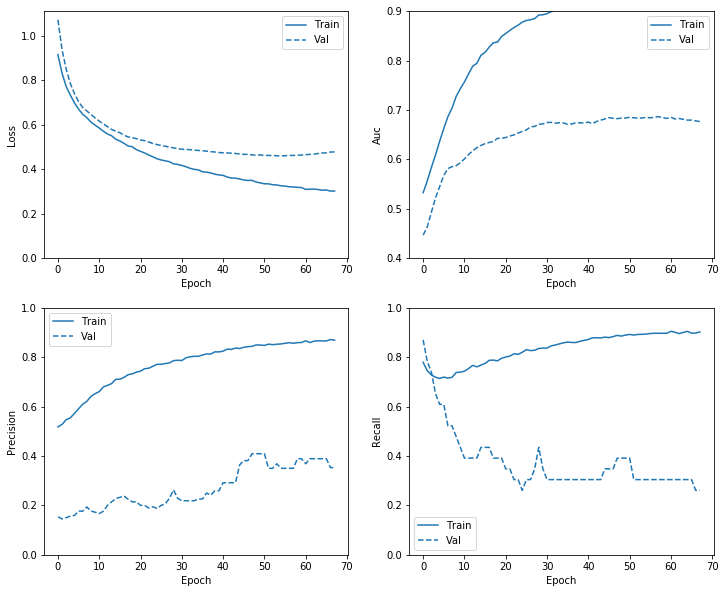

In [51]:
plot_metrics(resampled_history)

In [52]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.39555054903030396
tp :  10.0
fp :  15.0
tn :  156.0
fn :  19.0
accuracy :  0.83
precision :  0.4
recall :  0.3448276
auc :  0.77102244

Legitimate Transactions Detected (True Negatives):  156
Legitimate Transactions Incorrectly Detected (False Positives):  15
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  10
Total Fraudulent Transactions:  29


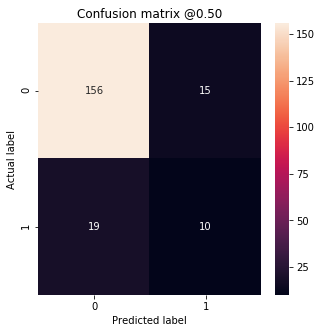

In [63]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

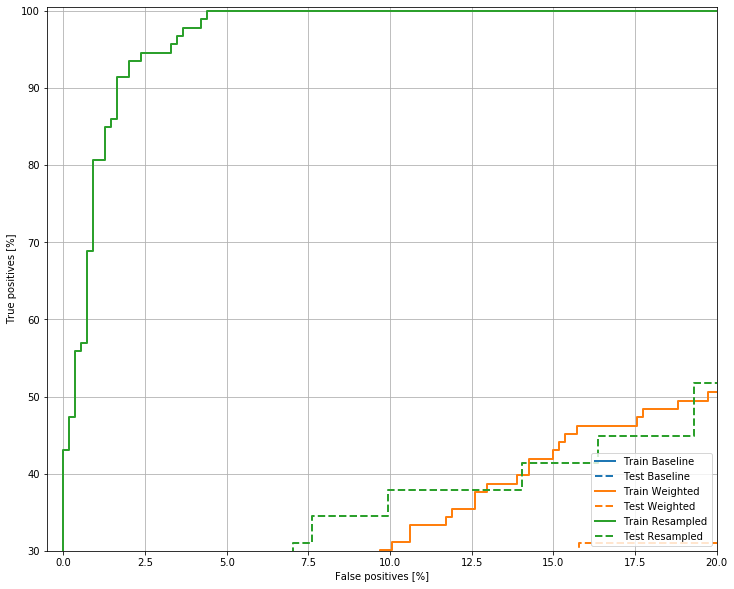

In [54]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled,  color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled,  color=colors[2], linestyle='--')
plt.legend(loc='lower right')